In [152]:
#References
#https://vitalflux.com/labelencoder-example-single-multiple-columns/
#https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
#https://www.geeksforgeeks.org/merge-two-dataframes-with-same-column-names/
#https://stackoverflow.com/questions/45269652/python-convert-string-to-float-error-with-negative-numbers
#https://michael-fuchs-python.netlify.app/2021/02/10/nn-multi-layer-perceptron-regressor-mlpregressor/
#https://stackoverflow.com/questions/45269652/python-convert-string-to-float-error-with-negative-numbers
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import seaborn as sb
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.linear_model import RidgeCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

Get Data From CSV File

In [153]:
fortune_500 =pd.read_csv('Fortune_500.csv',header=0)
fortune_500 =fortune_500[['Sector','Hqstate','Revenues','Revchange','Profits','Prftchange','Assets','Totshequity']]
fortune_500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sector       500 non-null    object 
 1   Hqstate      500 non-null    object 
 2   Revenues     500 non-null    int64  
 3   Revchange    500 non-null    float64
 4   Profits      500 non-null    float64
 5   Prftchange   500 non-null    object 
 6   Assets       500 non-null    int64  
 7   Totshequity  500 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 31.4+ KB


In [154]:
#Convert String to Integer
fortune_500=fortune_500.dropna()
le = LabelEncoder()
fortune_500.Sector = le.fit_transform(fortune_500.Sector)
fortune_500.Hqstate = le.fit_transform(fortune_500.Hqstate)
fortune_500['Totshequity'] = fortune_500['Totshequity'].astype(int)
fortune_500['Prftchange'] = fortune_500['Prftchange'].apply(lambda x: x.replace(',', ''))
fortune_500['Prftchange'] = fortune_500['Prftchange'].apply(lambda x: float(x.replace('\U00002013', '-')))


fortune_500.head()

Sector  Hqstate  Revenues  Revchange  Profits  Prftchange  Assets  \
0      16        1    485873        0.8  13643.0        -7.2  198825   
1       6       23    223604        6.1  24074.0         0.0  620854   
2      17        3    215639       -7.7  45687.0       -14.4  321686   
3       4       33    205004      -16.7   7840.0       -51.5  330314   
4      20        3    192487        6.2   2258.0        53.0   56563   

   Totshequity  
0        77798  
1       283001  
2       128249  
3       167325  
4         8924

([<matplotlib.patches.Wedge at 0x1a7a30448e0>,
 [Text(0.9503157628540769, 0.5539855150372383, 'Financials'),
  Text(0.17207792680247325, 1.086457172237987, 'Energy'),
  Text(-0.5238620008512992, 0.9672479537657722, 'Retailing'),
  Text(-0.9605886869426026, 0.5359751622210555, 'Technology'),
  Text(-1.0999999999999999, 2.5747358557800545e-08, 'Health Care'),
  Text(-1.0039607624734288, -0.4495139457389191, 'Wholesalers'),
  Text(-0.8018655204790328, -0.7530017842388489, 'Food, Beverages & Tobacco'),
  Text(-0.5658835265486748, -0.943279298183118, 'Business Services'),
  Text(-0.3201398344517453, -1.0523832412183356, 'Materials'),
  Text(-0.06217044952228803, -1.0982417016332047, 'Industrials'),
  Text(0.18571673051066115, -1.0842090647141955, 'Transportation'),
  Text(0.3920530197225097, -1.0277618545784144, 'Chemicals'),
  Text(0.5599455183205809, -0.9468162527717277, 'Engineering & Construction'),
  Text(0.7011663557913483, -0.8475645942972609, 'Household Products'),
  Text(0.82053523

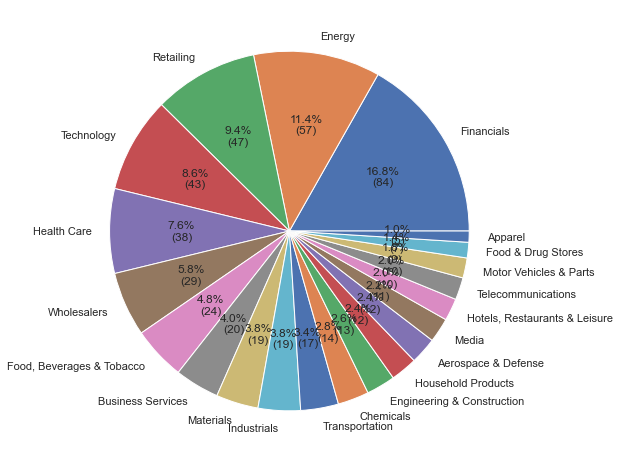

In [136]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

fortune_500 =pd.read_csv('Fortune_500.csv',header=0)
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
s = fortune_500['Sector'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))

In [133]:
fortune_500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sector       500 non-null    int32  
 1   Hqstate      500 non-null    int32  
 2   Revenues     500 non-null    int64  
 3   Revchange    500 non-null    float64
 4   Profits      500 non-null    float64
 5   Prftchange   500 non-null    float64
 6   Assets       500 non-null    int64  
 7   Totshequity  500 non-null    int32  
dtypes: float64(3), int32(3), int64(2)
memory usage: 25.5 KB


In [ ]:
correlation_matrix=sb.heatmap(fortune_500.corr(), annot=True)

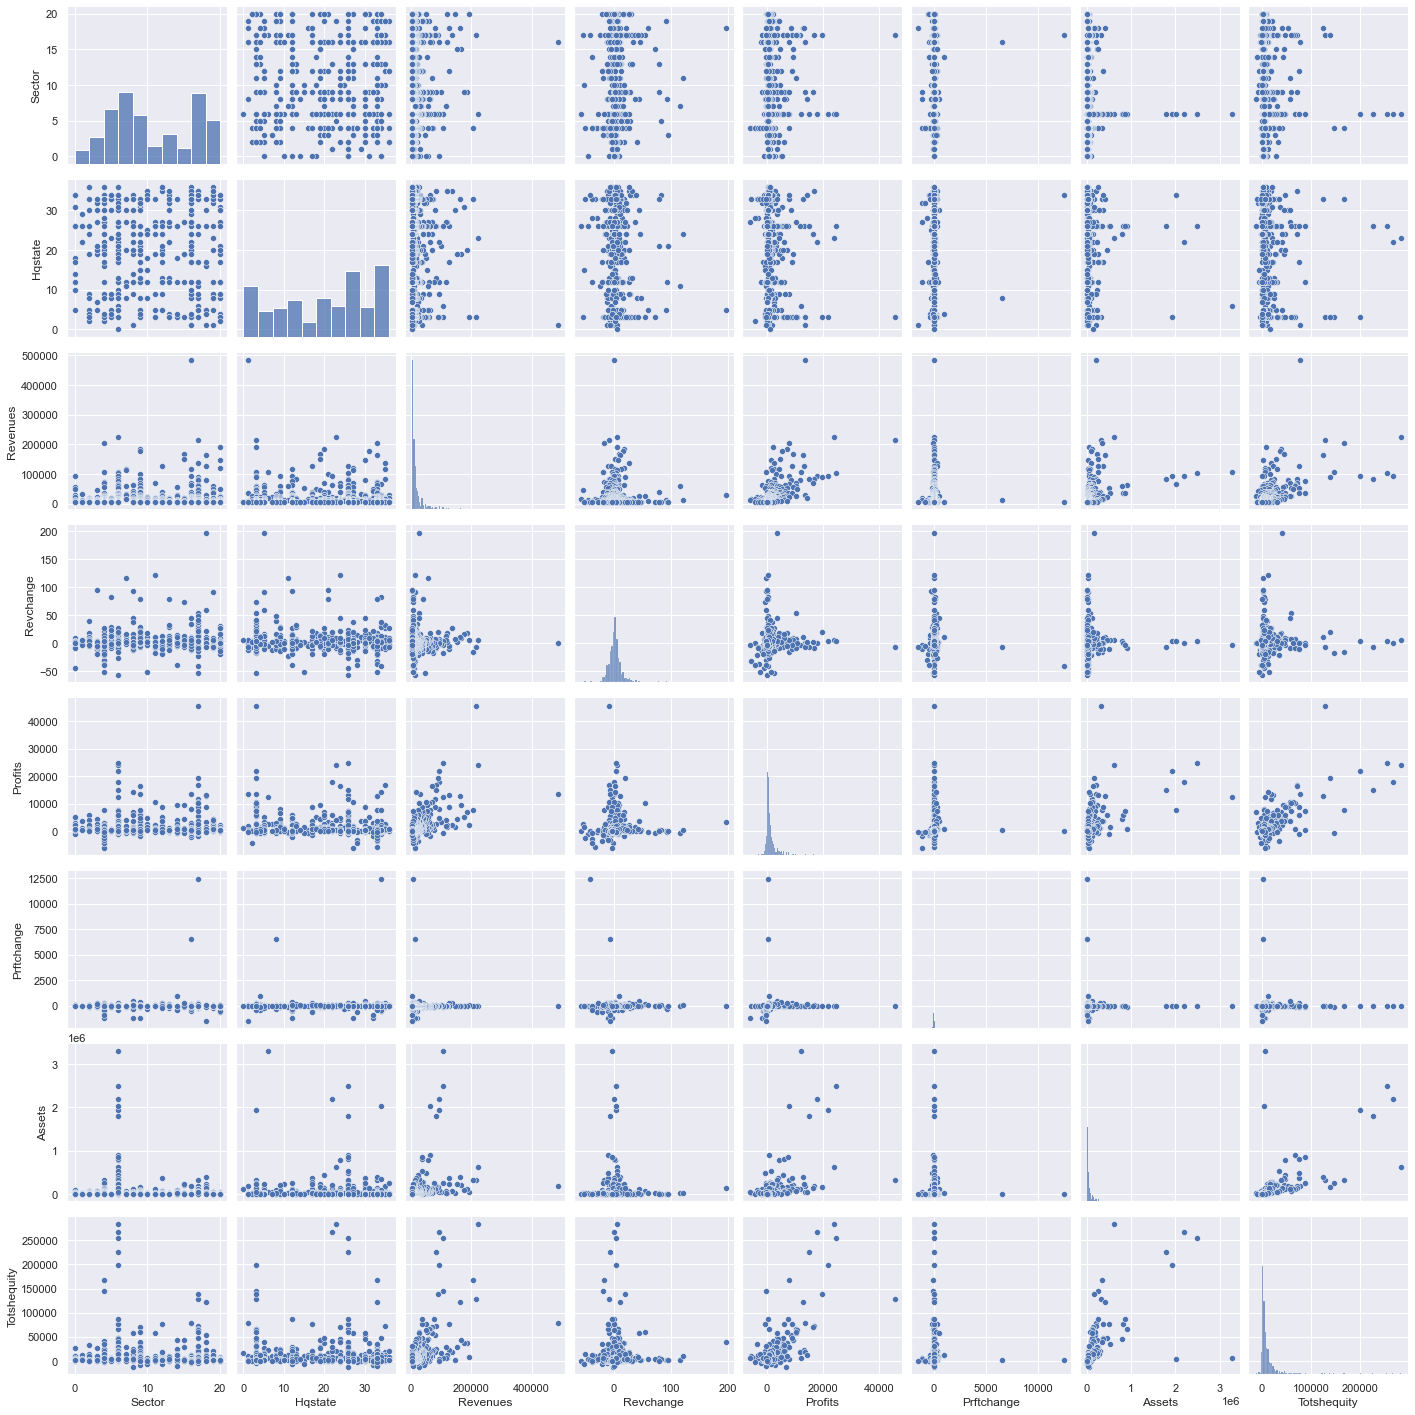

In [134]:
sb.pairplot(fortune_500)
plt.show()

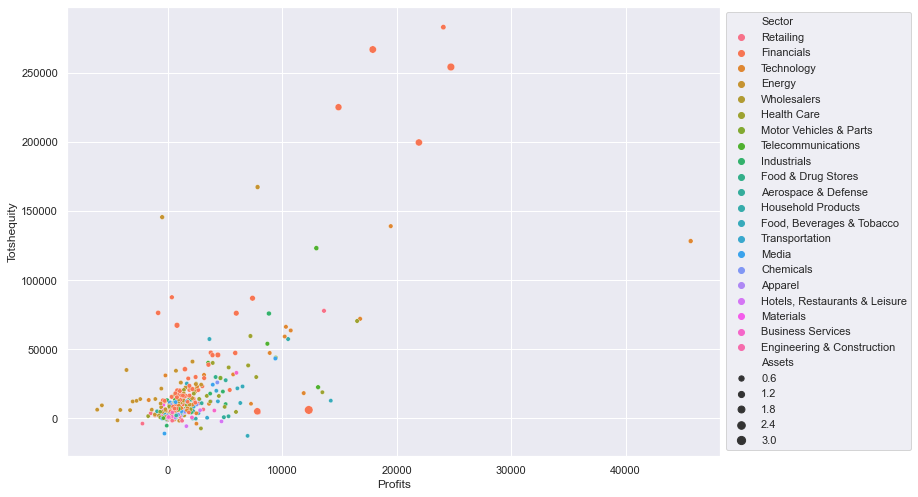

In [137]:
# fortune_500 = fortune_500.drop(fortune_500[fortune_500.Sector != "Health Care"].index)
ax = sb.scatterplot(x="Profits",
                y="Totshequity",
                hue="Sector",
                size="Assets",
                data=fortune_500)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

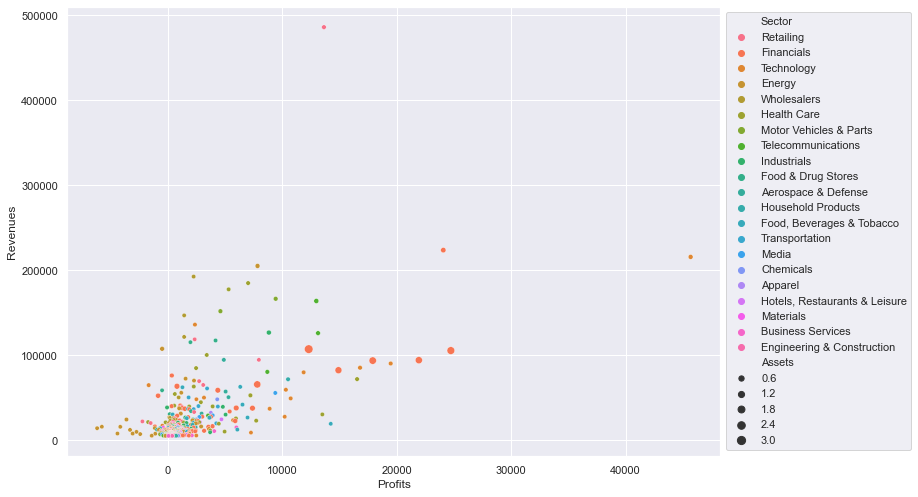

In [138]:
# fortune_500 = fortune_500.drop(fortune_500[fortune_500.Sector != "Health Care"].index)
ax = sb.scatterplot(x="Profits",
                y="Revenues",
                hue="Sector",
                size="Assets",
                data=fortune_500)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

REMOVAL OF OUTLIERS-

In [142]:
#this negatively impacts the model and so should be run on
fortune_500 = fortune_500.drop(fortune_500[fortune_500.Revenues > 400000].index)
fortune_500 = fortune_500.drop(fortune_500[fortune_500.Profits > 40000].index)
fortune_500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 1 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sector       498 non-null    int32  
 1   Hqstate      498 non-null    int32  
 2   Revenues     498 non-null    int64  
 3   Revchange    498 non-null    float64
 4   Profits      498 non-null    float64
 5   Prftchange   498 non-null    float64
 6   Assets       498 non-null    int64  
 7   Totshequity  498 non-null    int32  
dtypes: float64(3), int32(3), int64(2)
memory usage: 29.2 KB


COMMON STEPS FOR ALL REGRESSION MODELS-

In [155]:
X=fortune_500[['Sector','Hqstate','Revenues','Revchange','Prftchange','Assets','Totshequity']]
y=fortune_500['Profits']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=50) 


LINEAR REGRESSION-

Accuracy- 0.815943317559372
Mean Square Error- 3985312.925680629


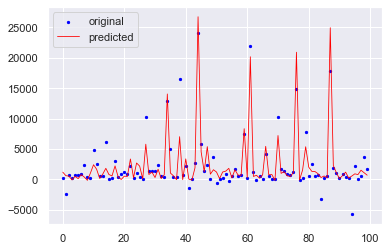

In [156]:

LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
predictions = LinReg.predict(X_test)
score=r2_score(y_test,predictions)
print("Accuracy-", score)
print("Mean Square Error-", metrics.mean_squared_error(y_test,predictions))

x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, predictions, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

LASSO REGRESSION-

Accuracy- 0.8159647401068154
Mean Square Error- 3984849.070991439


C:\Users\BRIAN PEREIRA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profits', ylabel='Density'>

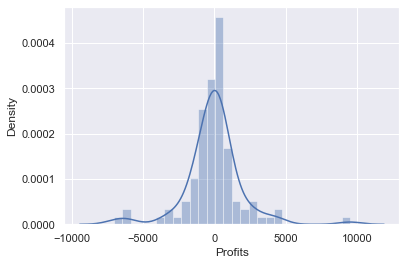

In [157]:
model = Lasso(alpha=10)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=50)



#Fitting the model
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#Model Predictions
from sklearn.metrics import mean_absolute_error,r2_score
print("Accuracy-",r2_score(y_test,y_pred))
y_pred = model.predict(X_test)
print("Mean Square Error-",metrics.mean_squared_error(y_test,y_pred))
#Visualizing the results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(y_test-y_pred)




HYPERPARAMETER SELECTION USING LASSO REGRESSION-

In [128]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=50)

#define parameters

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
param = {
    'alpha':[.00001, 0.0001,0.001, 0.01,0.1,1,10,100000],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'positive':[True,False],
    'selection':['cyclic','random'],
    }

#define model
model = Lasso()

# define search
search = GridSearchCV(model, param, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X_sc, y)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -6964017.730724948
Best Hyperparameters: {'alpha': 10, 'fit_intercept': True, 'normalize': False, 'positive': False, 'selection': 'random'}


C:\Users\BRIAN PEREIRA\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Accuracy- 0.8159647415071976
Mean Square Error- 3984849.0406694673


C:\Users\BRIAN PEREIRA\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\BRIAN PEREIRA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profits', ylabel='Density'>

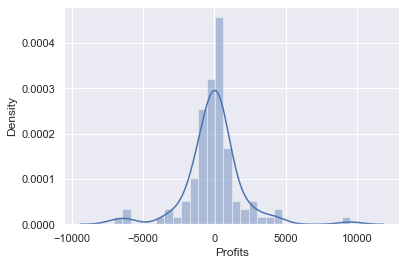

In [132]:
#the hyperparameters are chosen from above
model = Lasso(alpha=10,fit_intercept= True, normalize = False, positive= False, selection = 'random')

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy-",r2_score(y_test,y_pred))
print("Mean Square Error-",metrics.mean_squared_error(y_test,y_pred))
#Visualizing the results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(y_test-y_pred)

FEATURE SELECTION USING LASSO REGRESSION-

In [78]:
def lasso(alphas):
 
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = ['Sector','Hqstate','Revenues','Revchange','Prftchange','Assets','Totshequity']
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
    # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the dataframe    
    return df

#test with following co-effiecients
lasso([0.1,1,10,100000])

Feature Name  Alpha = 0.100000  Alpha = 1.000000  Alpha = 10.000000  \
0       Sector         50.553028         50.527372          50.270809   
1      Hqstate        -21.582026        -21.577294         -21.529966   
2     Revenues          0.029378          0.029378           0.029386   
3    Revchange          2.510990          2.509896           2.498959   
4   Prftchange          0.136398          0.136407           0.136495   
5       Assets          0.001687          0.001687           0.001686   
6  Totshequity          0.063293          0.063292           0.063288   

   Alpha = 100000.000000  
0               0.000000  
1              -0.000000  
2               0.030843  
3               0.000000  
4               0.000000  
5               0.001528  
6               0.062427

POLYNOMIAL REGRESSSION-

1110.126637593158
0.9203546510891516


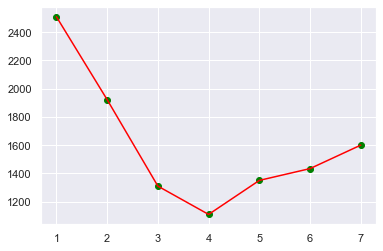

In [158]:
degree=4

poly_model = PolynomialFeatures(degree=degree)

poly_x_values = poly_model.fit_transform(X)

# fit the model
poly_model.fit(poly_x_values, y)


regression_model = LinearRegression()

regression_model.fit(poly_x_values, y)

y_pred = regression_model.predict(poly_x_values)

regression_model.coef_

#Calcualte error
print(metrics.mean_squared_error(y, y_pred, squared=False))

#Calculate score
score=r2_score(y,y_pred)
print(score)


# check our accuracy for each degree, the lower the error the better
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(X)
   poly_model.fit(poly_x_values, y)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(metrics.mean_squared_error(y, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

RIDGE REGRESSION-

The best alpha value is  10
Accuracy is 0.8160826230314658
Mean Square Error is  3982296.5945635424


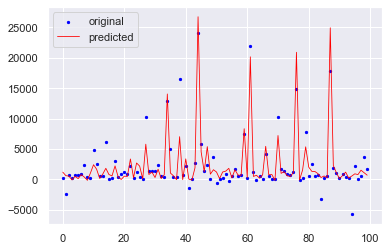

In [159]:
alphas=[0.000001,0.00001,0.0001,0.001,0.1,0.5,1,10]
ridgereg = RidgeCV(alphas=10)
ridgereg.fit(X_train,y_train)
print("The best alpha value is ",ridgereg.alpha_)
y_pred = ridgereg.predict(X_test)
score=r2_score(y_test,y_pred)
print("Accuracy is",score)
print("Mean Square Error is ",metrics.mean_squared_error(y_test,y_pred))
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()


MPL REGRESSOR-

C:\Users\BRIAN PEREIRA\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\BRIAN PEREIRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Accuracy is 0.8264179500397038
Mean Square Error is 3758509.4884890127


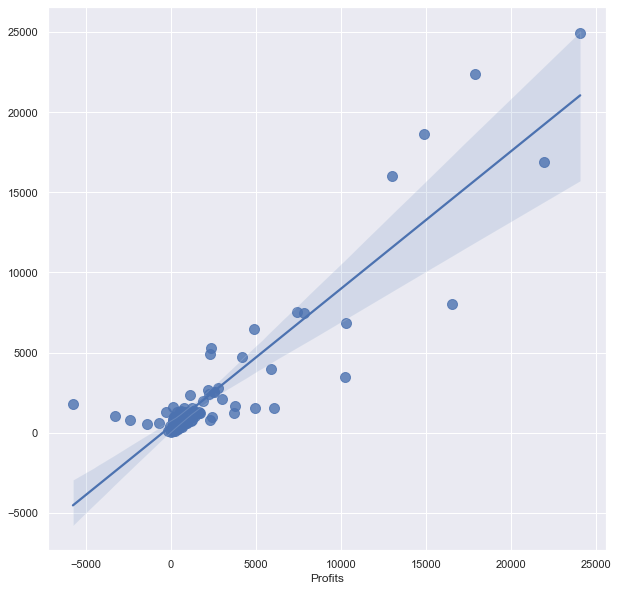

In [160]:
model = MLPRegressor()
model.fit(X_train, y_train)

expected_y  = y_test
predicted_y = model.predict(X_test)
print("Accuracy is",metrics.r2_score(expected_y, predicted_y))
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})
print("Mean Square Error is",metrics.mean_squared_error(expected_y, predicted_y))